In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import io

csv_filename = next(iter(uploaded))


In [ ]:
import pandas as pd

data = pd.read_csv(io.StringIO(uploaded[csv_filename].decode('utf-8')))


In [ ]:
import os

print(os.listdir())


['.config', 'AB_NYC_2019.csv', '.ipynb_checkpoints', 'drive', 'sample_data']


In [ ]:
data =pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [ ]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

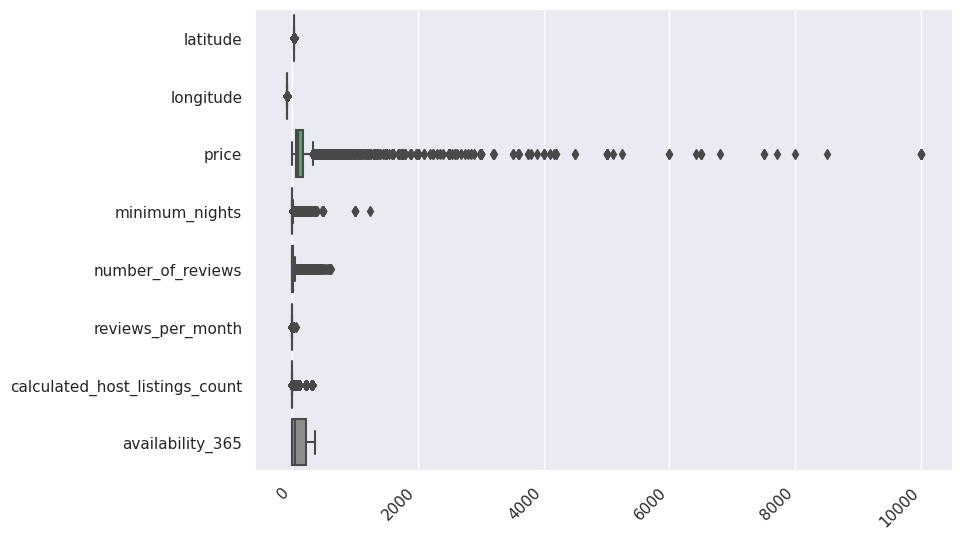

In [ ]:
data.drop(["id", "host_id"], inplace=True, axis=1)

sns.boxplot(data=data, orient="h")

# Sütunların etiketlerini düzenliyoruz
plt.xticks(rotation=45, ha="right")

# Grafikleri ekrana bastırıyoruz
plt.show()

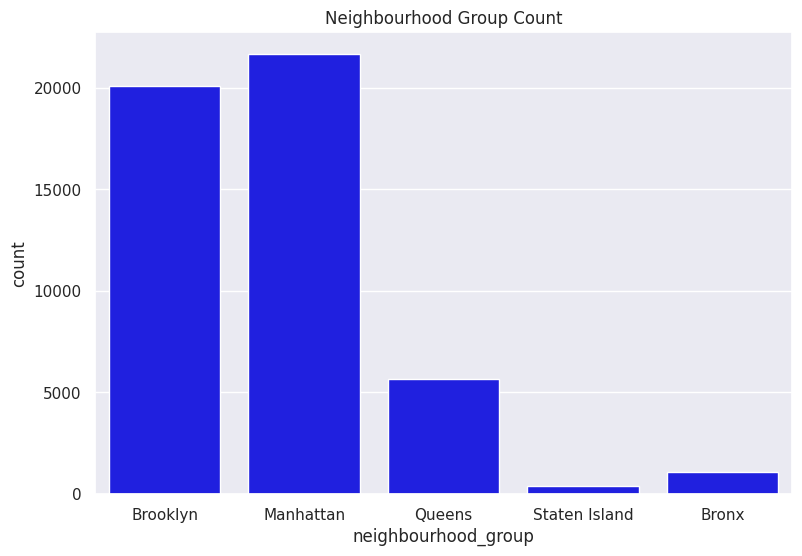

In [ ]:
sns_plot = sns.countplot(x="neighbourhood_group", data=data, color="blue").set_title("Neighbourhood Group Count")


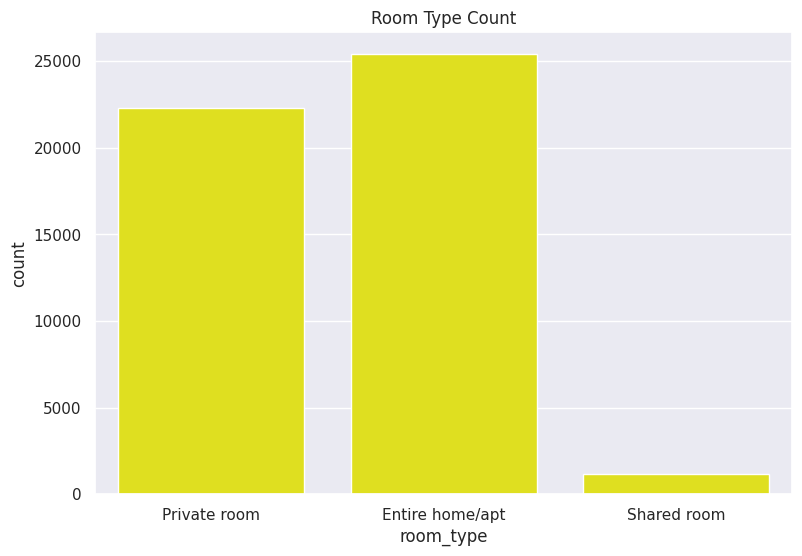

In [ ]:
sns_plot= sns.countplot(x="room_type", data=data, color="yellow").set_title("Room Type Count")

Text(0.5, 1.0, 'Neighbourhood Group - Room Type Counts')

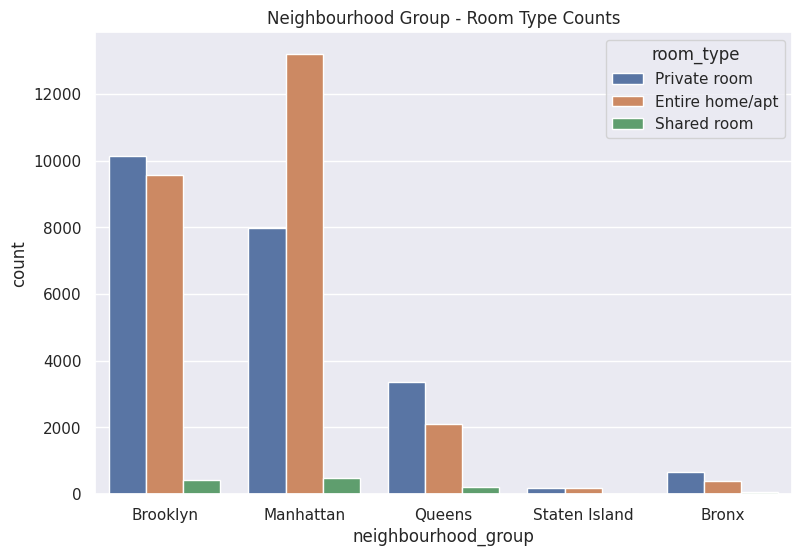

In [ ]:
sns.countplot(x="neighbourhood_group", hue="room_type", data=data)
plt.title("Neighbourhood Group - Room Type Counts")

Text(0.5, 1.0, 'Room Type - Neighbourhood Group Counts')

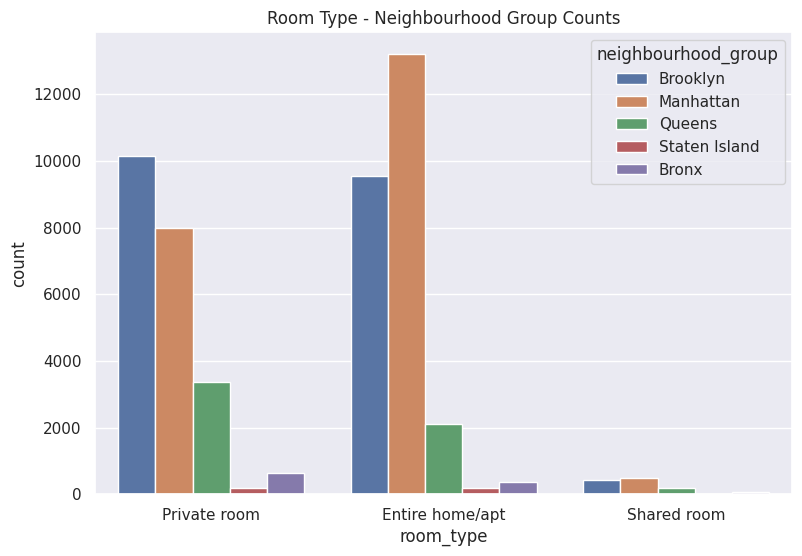

In [ ]:
sns.countplot(x="room_type", hue="neighbourhood_group", data=data)
plt.title("Room Type - Neighbourhood Group Counts")

Text(0.5, 1.0, 'Neighbourhood Group - Room Type Price')

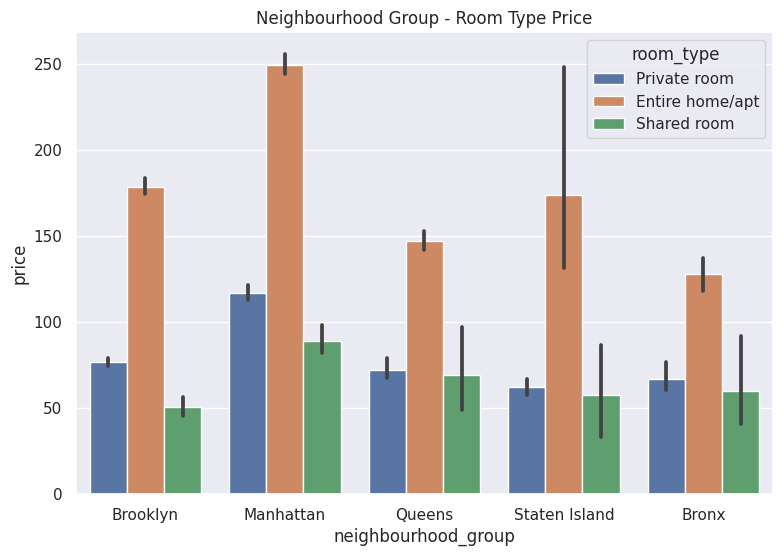

In [ ]:
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=data)
plt.title("Neighbourhood Group - Room Type Price")

Text(0.5, 1.0, 'Cut - Price')

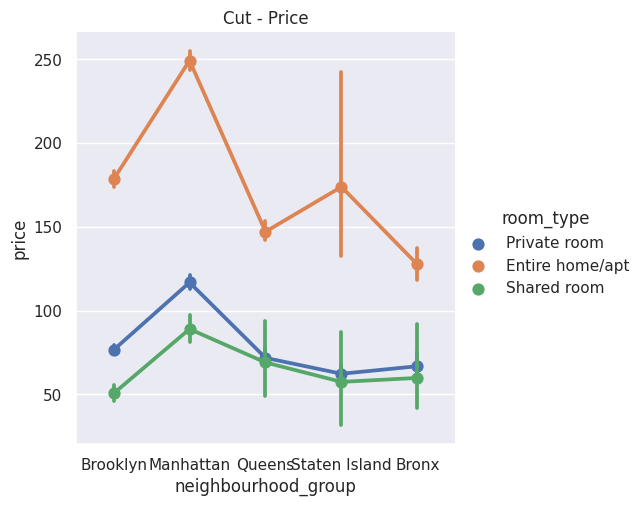

In [ ]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=data)
plt.title("Cut - Price")

<Axes: xlabel='availability_365', ylabel='Count'>

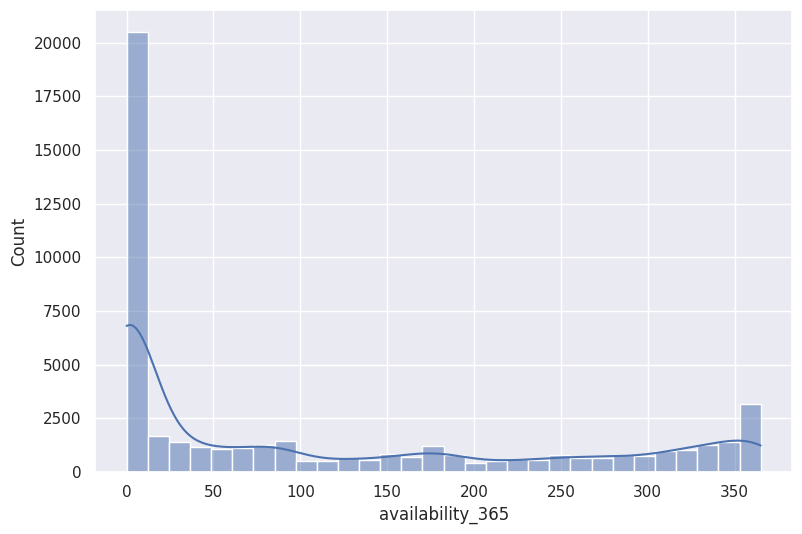

In [ ]:
sns.histplot(data["availability_365"], kde=True) # bins= auto

<ipython-input-33-396f7d7a569e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))


Text(0.5, 1.0, 'Room Type - Price Dağılımı')

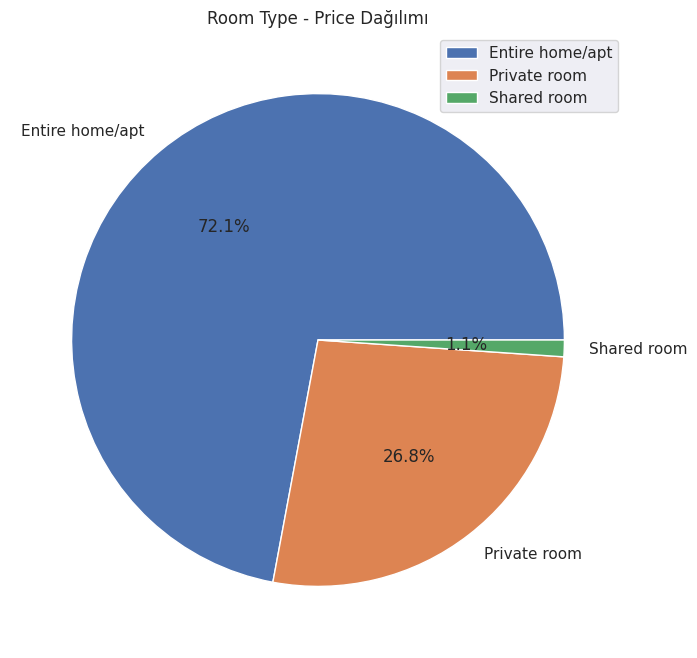

In [ ]:
data.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))
plt.title("Room Type - Price Dağılımı")

Text(0.5, 1.0, 'Room Type Kategorileri Dağılımı')

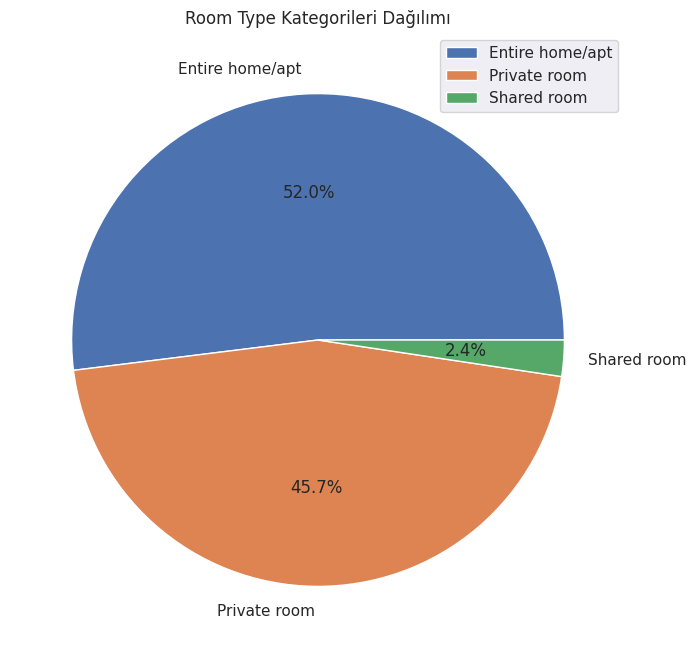

In [ ]:
data.groupby("room_type").size().plot.pie(y="count", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))
plt.title("Room Type Kategorileri Dağılımı")

<ipython-input-35-7e9ea1edb0e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))


Text(0.5, 1.0, 'Neighbourhood Group - Price Dağılımı')

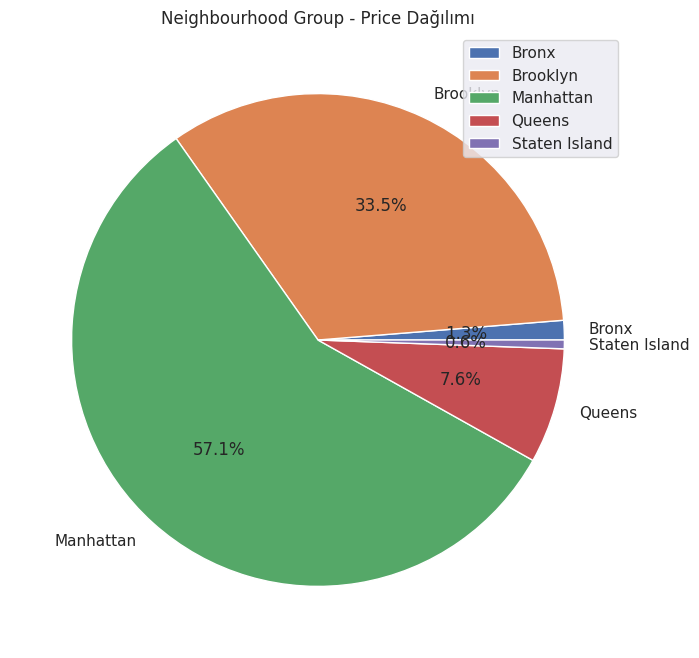

In [ ]:
data.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))
plt.title("Neighbourhood Group - Price Dağılımı")

Text(0.5, 1.0, 'Neighbourhood Group Verisetinde Dağılımı')

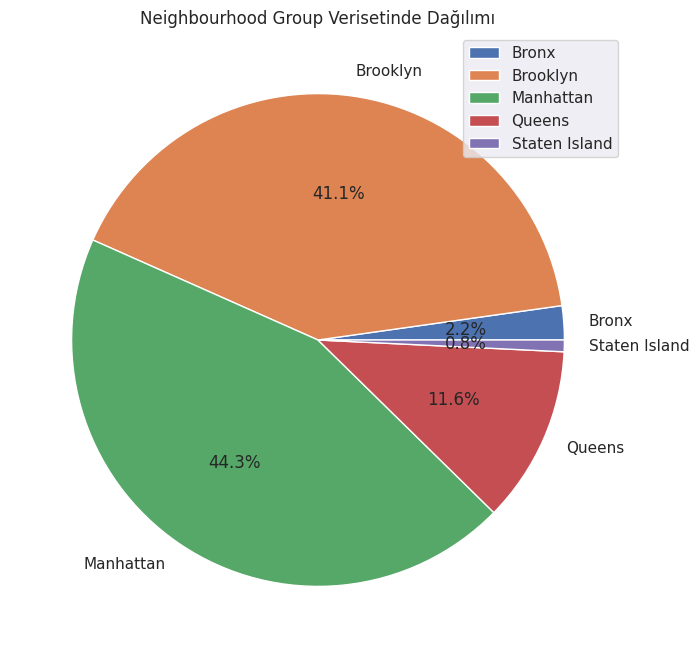

In [ ]:
data.groupby("neighbourhood_group").size().plot.pie(y="count", autopct="%.1f%%", ylabel="", legend=True, figsize=(8,8))
plt.title("Neighbourhood Group Verisetinde Dağılımı")

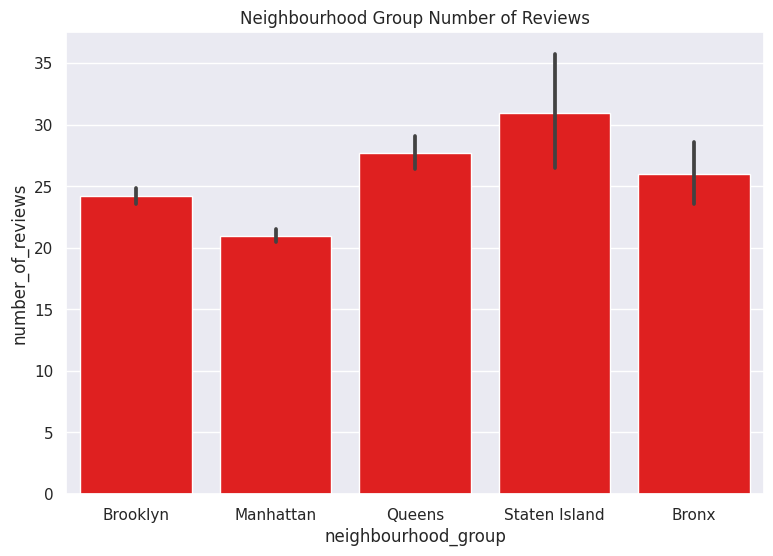

In [ ]:
sns_plot = sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=data, color="red").set_title("Neighbourhood Group Number of Reviews")


<Figure size 1000x500 with 0 Axes>

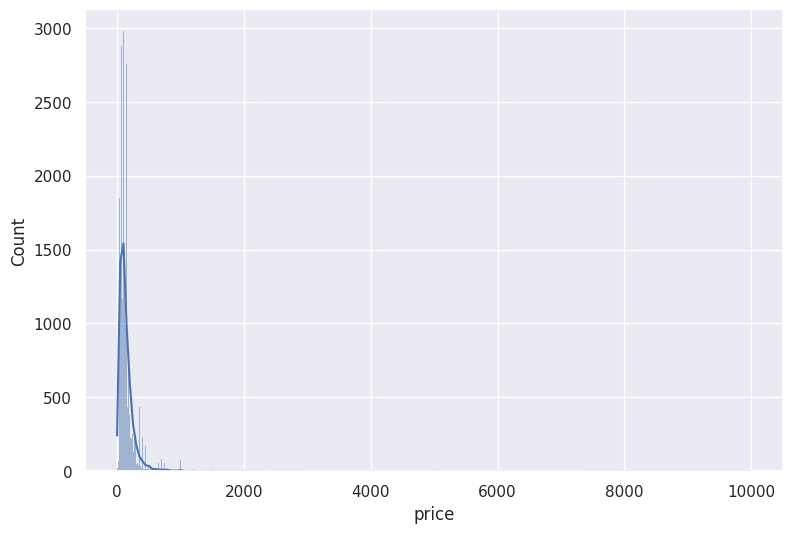

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.histplot(data["price"], kde=True) # bins= auto
plt.figure(figsize=(10,5))

Text(0.5, 1.0, '0-1000 arası Price Dağılımlar')

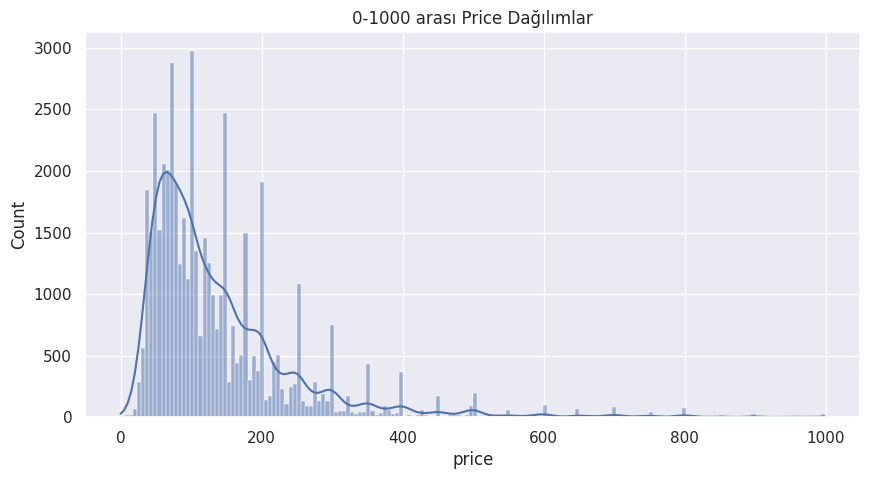

In [ ]:
filtered_data0to1000 = data[data["price"] < 1000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data0to1000["price"], kde=True) # bins= auto
plt.title("0-1000 arası Price Dağılımlar")

Text(0.5, 1.0, '1000-10000 arası Price Dağılımlar')

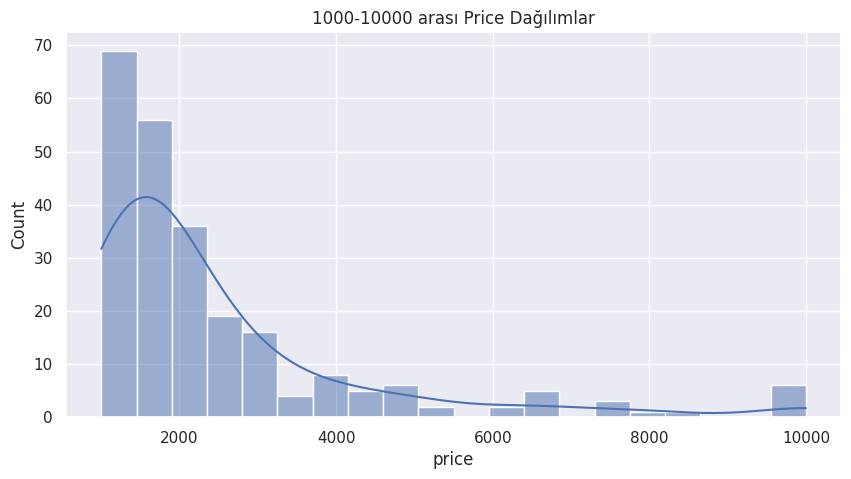

In [ ]:
filtered_data1000to10000 = data[data["price"] > 1000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data1000to10000["price"], kde=True) # bins= auto
plt.title("1000-10000 arası Price Dağılımlar")

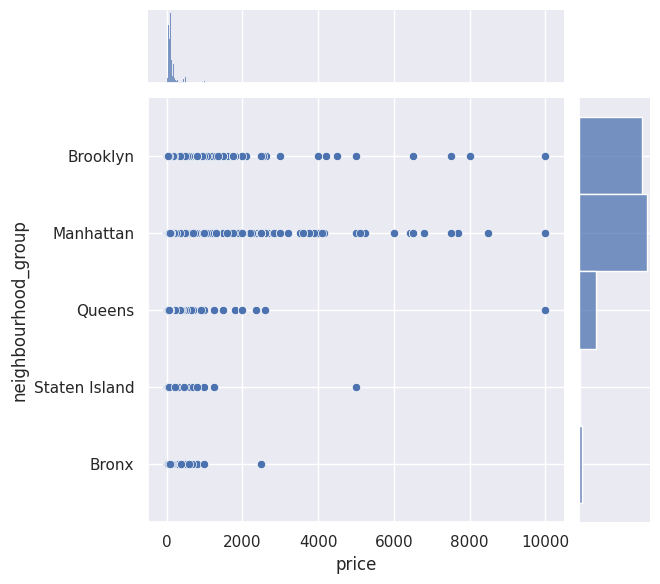

In [ ]:
sns.jointplot(x="price", y=data["neighbourhood_group"], data=data)

Text(0.5, 1.0, 'Availability - Reviews')

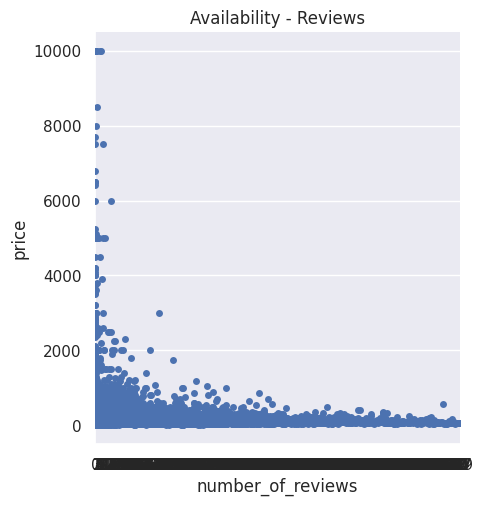

In [ ]:
sns.catplot(x="number_of_reviews",y="price", data=data)
plt.title("Availability - Reviews")

Text(0.5, 1.0, 'Availability - Reviews')

<Figure size 2000x800 with 0 Axes>

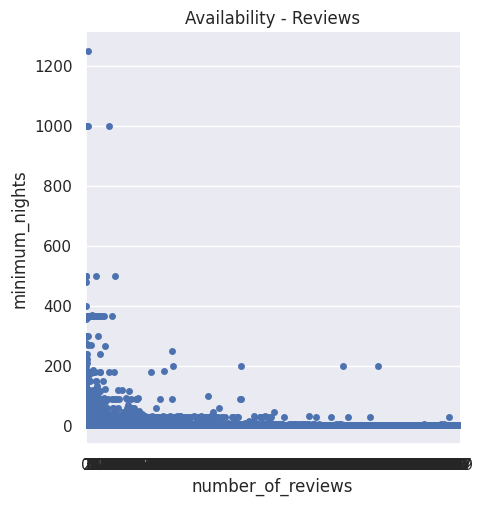

In [ ]:
sns.catplot(x="number_of_reviews",y="minimum_nights", data=data)
plt.title("Availability - Reviews")

Text(0.5, 1.0, 'Number of Reviews - Minimum Nights')

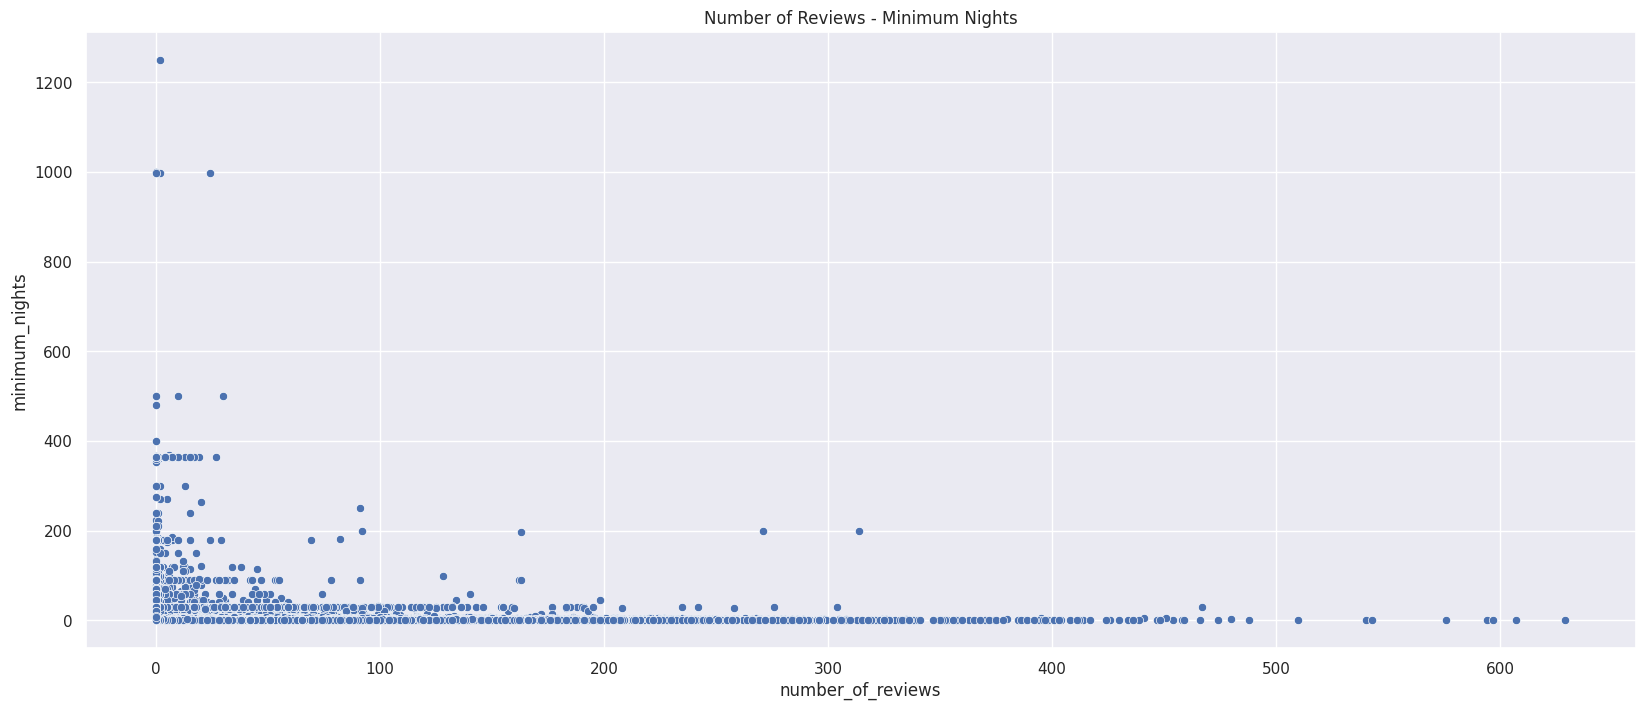

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x="number_of_reviews", y="minimum_nights", data=data)
plt.title("Number of Reviews - Minimum Nights")

Text(0.5, 1.0, 'Number of Reviews - Minimum Nights')

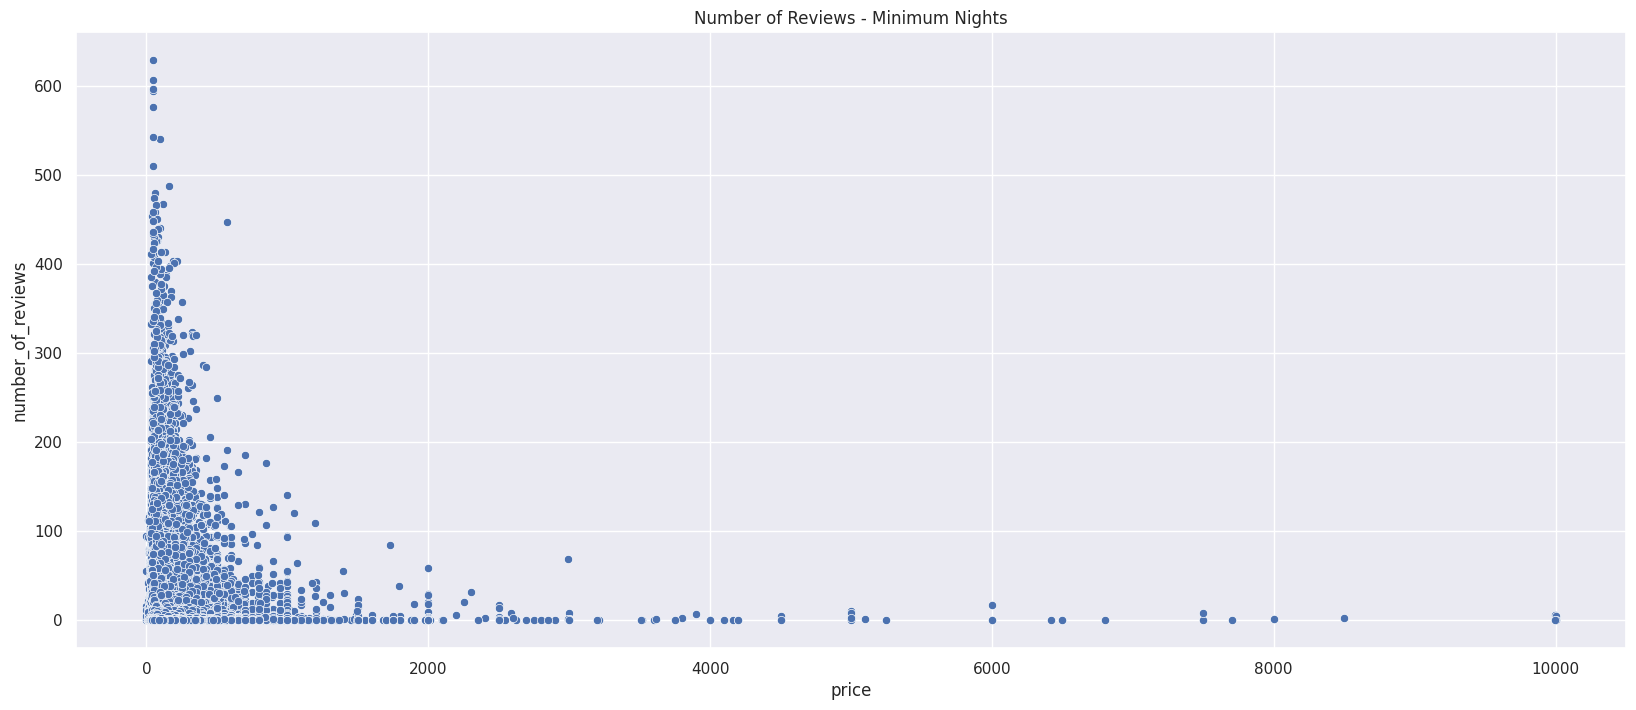

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(y="number_of_reviews",x="price", data=data)
plt.title("Number of Reviews - Minimum Nights")

<ipython-input-69-0b3a3975c8c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


Text(0.5, 1.0, 'Correlation Matrix')

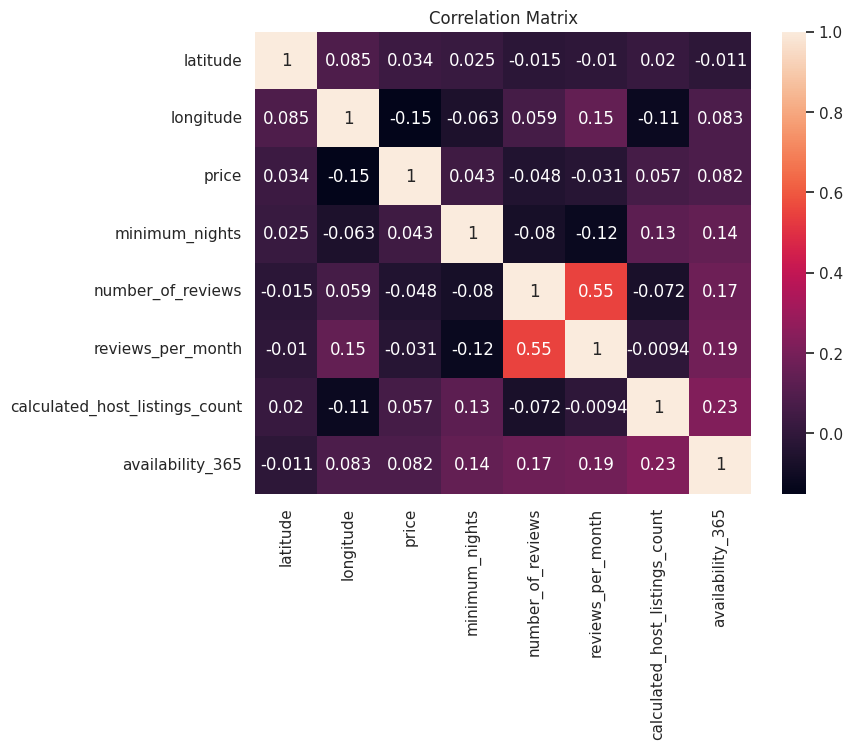

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True);
plt.title("Correlation Matrix")